In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
df = pd.read_csv('/Housing.csv')  # Make sure you downloaded the dataset

# preprocessing
df = pd.get_dummies(df, drop_first=True)  # Convert categorical columns
df.dropna(inplace=True)

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)  # Independent variables
y = df['price']               # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


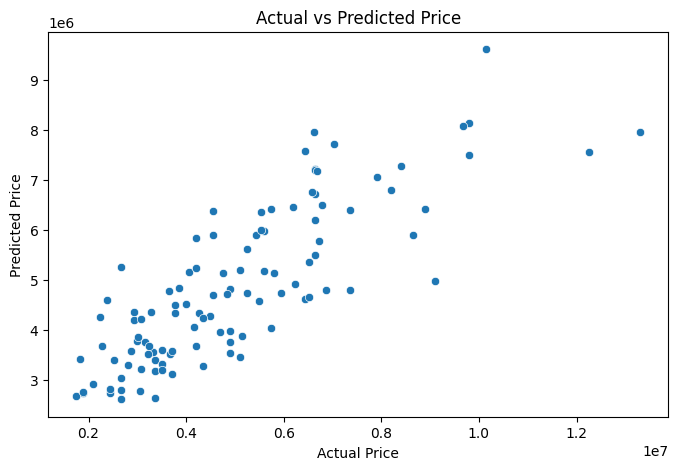

                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

# Coefficients
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coef_df)